<a href="https://colab.research.google.com/github/ruchitha11n/data-science-ExcelR/blob/main/XGBM_%26_LGBM_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import lightgbm as lgb
import xgboost as xgb

In [ ]:
# Step 2: Load the Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic_df = pd.read_csv(url)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


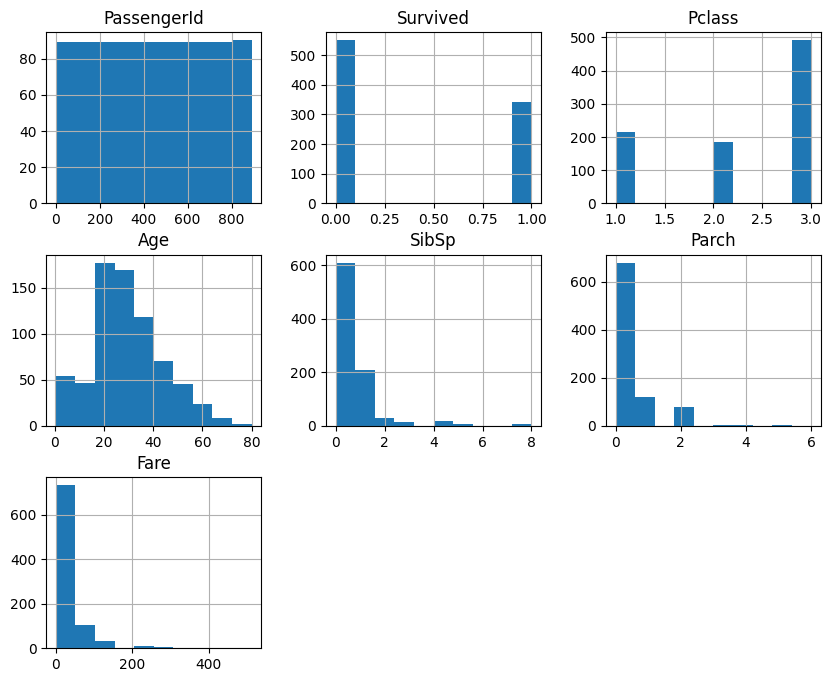

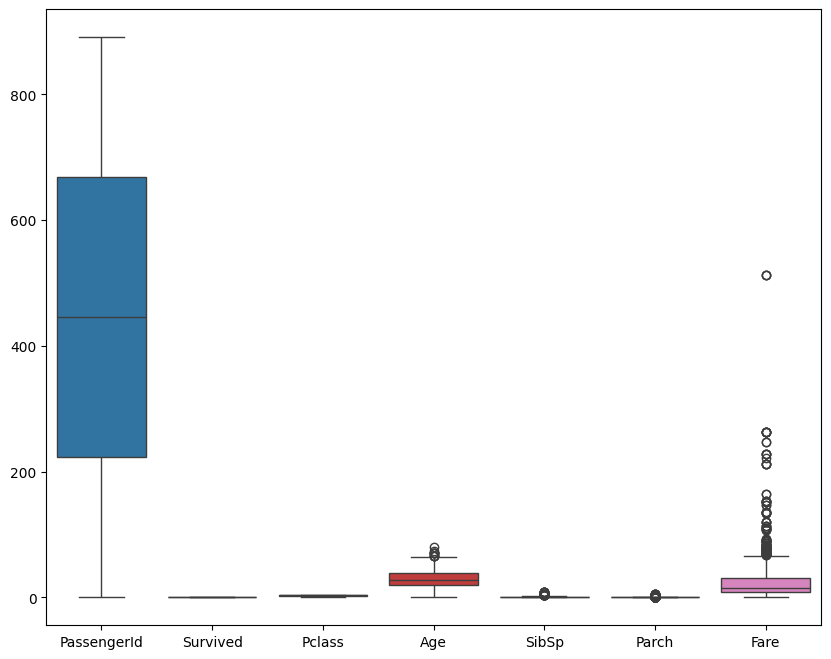

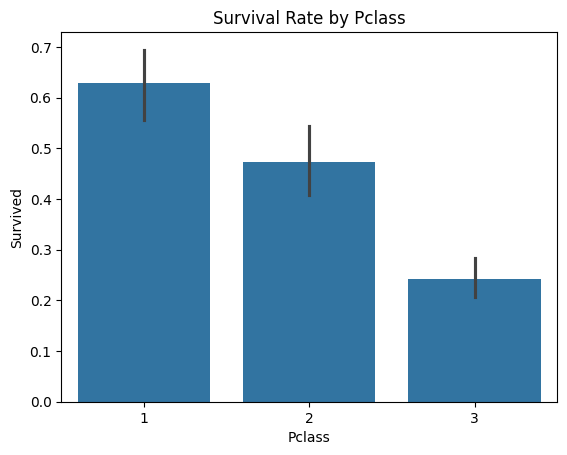

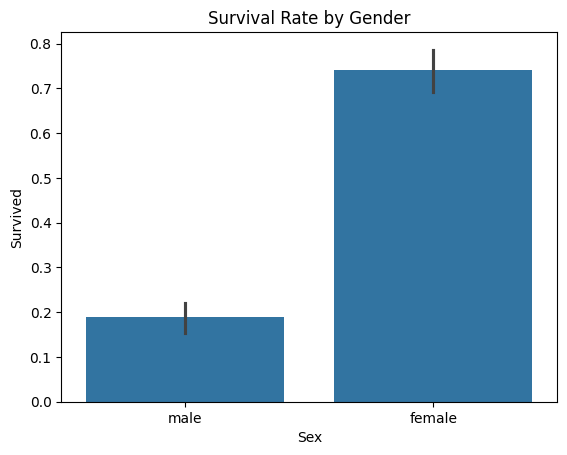

In [ ]:
# Step 3: Exploratory Data Analysis (EDA)
# Check for missing values
print(titanic_df.isnull().sum())

# Data distributions using histograms and box plots
titanic_df.hist(figsize=(10, 8))
plt.show()

plt.figure(figsize=(10, 8))
sns.boxplot(data=titanic_df.select_dtypes(include=[np.number]))
plt.show()

# Visualize relationships between features and survival using scatter plots and bar plots
sns.barplot(x='Pclass', y='Survived', data=titanic_df)
plt.title('Survival Rate by Pclass')
plt.show()

sns.barplot(x='Sex', y='Survived', data=titanic_df)
plt.title('Survival Rate by Gender')
plt.show()

In [ ]:
# Step 4: Data Preprocessing
# 1. Impute missing values
# Separate numeric columns dynamically
numeric_columns = titanic_df.select_dtypes(include=[np.number]).columns.tolist()

# Impute numeric columns with median
imputer = SimpleImputer(strategy='median')
titanic_df[numeric_columns] = imputer.fit_transform(titanic_df[numeric_columns])

# Impute categorical columns with the most frequent value
categorical_columns = titanic_df.select_dtypes(include=[object]).columns.tolist()

imputer_cat = SimpleImputer(strategy='most_frequent')
titanic_df[categorical_columns] = imputer_cat.fit_transform(titanic_df[categorical_columns])

# 2. Encode categorical variables using Label Encoding for simplicity
label_encoder = LabelEncoder()
titanic_df['Sex'] = label_encoder.fit_transform(titanic_df['Sex'])
titanic_df['Embarked'] = label_encoder.fit_transform(titanic_df['Embarked'].astype(str))


In [ ]:
# Drop columns that cannot be directly used by the model
titanic_df.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True)

In [ ]:
# Step 5: Split dataset into features and target variable
X = titanic_df.drop(columns=['Survived'])
y = titanic_df['Survived']

In [ ]:
# Step 6: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Step 7: Build and train the models
# 1. LightGBM
lgb_model = lgb.LGBMClassifier(n_estimators=100, random_state=42)
lgb_model.fit(X_train, y_train)

# 2. XGBoost
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)


[LightGBM] [Info] Number of positive: 231, number of negative: 392
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000327 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 395
[LightGBM] [Info] Number of data points in the train set: 623, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.370787 -> initscore=-0.528844
[LightGBM] [Info] Start training from score -0.528844
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Step 8: Model Evaluation
# Predict on test data
y_pred_lgb = lgb_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)

# Calculate metrics for LightGBM
print("LightGBM Performance Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_lgb))
print("Precision:", precision_score(y_test, y_pred_lgb))
print("Recall:", recall_score(y_test, y_pred_lgb))
print("F1 Score:", f1_score(y_test, y_pred_lgb))

# Calculate metrics for XGBoost
print("\nXGBoost Performance Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))
print("F1 Score:", f1_score(y_test, y_pred_xgb))

LightGBM Performance Metrics:
Accuracy: 0.8171641791044776
Precision: 0.8163265306122449
Recall: 0.7207207207207207
F1 Score: 0.7655502392344498

XGBoost Performance Metrics:
Accuracy: 0.8097014925373134
Precision: 0.8
Recall: 0.7207207207207207
F1 Score: 0.7582938388625592


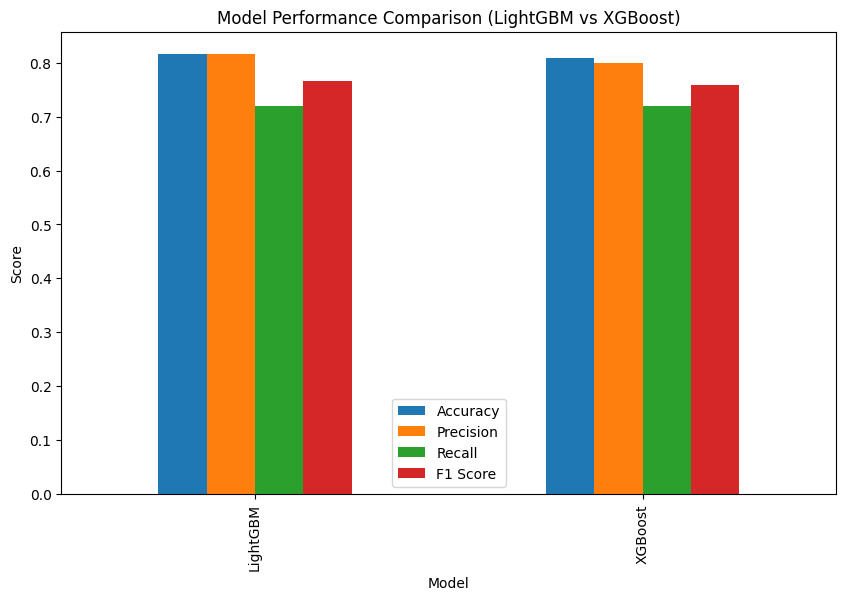

In [ ]:
# Step 9: Visualize the results
models = ['LightGBM', 'XGBoost']
accuracies = [accuracy_score(y_test, y_pred_lgb), accuracy_score(y_test, y_pred_xgb)]
precisions = [precision_score(y_test, y_pred_lgb), precision_score(y_test, y_pred_xgb)]
recalls = [recall_score(y_test, y_pred_lgb), recall_score(y_test, y_pred_xgb)]
f1_scores = [f1_score(y_test, y_pred_lgb), f1_score(y_test, y_pred_xgb)]

# Plot performance comparison
metrics_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1_scores
})

metrics_df.set_index('Model', inplace=True)
metrics_df.plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison (LightGBM vs XGBoost)')
plt.ylabel('Score')
plt.show()